In [16]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [17]:
# 1. Download data
data = yf.download('GOOG', start='2018-01-01', end='2023-12-31')
close_prices = data['Close'].values.reshape(-1, 1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [18]:
# 2. Scale prices between 0 and 1
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(close_prices)

In [19]:
# 3. Create sequences (use past 60 days to predict next day)
seq_length = 60
X, y = [], []
for i in range(len(scaled_prices) - seq_length):
    X.append(scaled_prices[i:i+seq_length])
    y.append(scaled_prices[i+seq_length])
X, y = np.array(X), np.array(y)


In [20]:
# 4. Train-test split (80%-20%)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [21]:

# 5. Build simple LSTM model
model = Sequential([
    LSTM(50, input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# 6. Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0499
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2215e-04
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2488e-04
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5097e-04
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0149e-04
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4408e-04
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.6708e-04
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5474e-04
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4740e-04


In [23]:
# 7. Predict and inverse scale
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


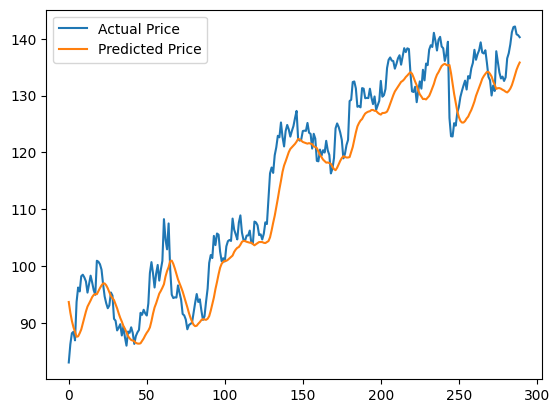

In [24]:
# 8. Plot results
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.legend()
plt.show()